# Loan Application Status And Prediction

## Problem Statememnt

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:
- Loan_ID
- Gender
- Married
- Dependents
- Education
- Self_Employed
- ApplicantIncome
- CoapplicantIncome
- Loan_Amount
- Loan_Amount_Term
- Credit History
- Property_Area

Dependent Variable (Target Variable):
- Loan_Status

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score
import joblib
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None) # to see all the rows
pd.set_option('display.max_columns', None) # to see all the columns

## Importing and exploring dataset

In [2]:
Loan=pd.read_csv('Loan Application status prediction.csv')
Loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [3]:
Loan.shape

(614, 13)

Dataset has 614 rows and 13 columns.

In [4]:
Loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


First five rows of the dataset.

In [5]:
Loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


Last five rows of the dataset.

In [6]:
Loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are 8 object type,3 float type and 1 int type column.

In [7]:
Loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can understand there are many null values in the columns.

In [8]:
Loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
UN=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
UN

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

###### We will check the unique values in each column.

In [10]:
for i in UN:
    print('column name:',i,'and unique variables are ',Loan[i].unique())

column name: Gender and unique variables are  ['Male' 'Female' nan]
column name: Married and unique variables are  ['No' 'Yes' nan]
column name: Dependents and unique variables are  ['0' '1' '2' '3+' nan]
column name: Education and unique variables are  ['Graduate' 'Not Graduate']
column name: Self_Employed and unique variables are  ['No' 'Yes' nan]
column name: Loan_Amount_Term and unique variables are  [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
column name: Credit_History and unique variables are  [ 1.  0. nan]
column name: Property_Area and unique variables are  ['Urban' 'Rural' 'Semiurban']
column name: Loan_Status and unique variables are  ['Y' 'N']


There are null varialbles most of the categorical columns.

###### We will check the count of each variable the column.

In [11]:
for i in UN:
    print('column name:',i,'and unique variables are \n ',Loan[i].value_counts(),'\n')

column name: Gender and unique variables are 
  Male      489
Female    112
Name: Gender, dtype: int64 

column name: Married and unique variables are 
  Yes    398
No     213
Name: Married, dtype: int64 

column name: Dependents and unique variables are 
  0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

column name: Education and unique variables are 
  Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

column name: Self_Employed and unique variables are 
  No     500
Yes     82
Name: Self_Employed, dtype: int64 

column name: Loan_Amount_Term and unique variables are 
  360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64 

column name: Credit_History and unique variables are 
  1.0    475
0.0     89
Name: Credit_History, dtype: int64 

column name: Property_Area and unique variables are 
  Semiurban    233
Urban        202
Ru

###### We understand that target column is imbalanced.

In [12]:
Loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Observastion:
    
1)Null values are present in Loan_Amount,Credit_History and Loan_Amount_Term column.

2)There is huge difference between 75% and max values in application income,co applicant income and  Loan amount column ,leading to possibility of outliers. 

## Exploratory Data Analysis

In [13]:
Loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

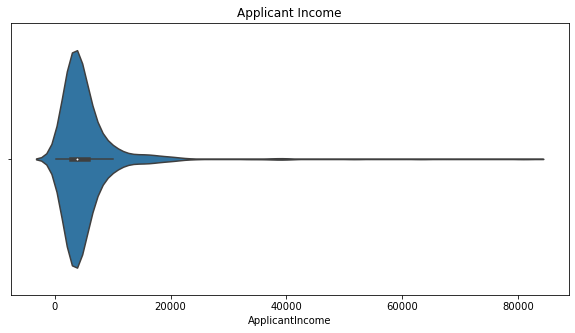

In [14]:
plt.figure(figsize=(10,5))
sns.violinplot(Loan['ApplicantIncome'])
plt.title('Applicant Income')
plt.show()

Observation:
 
There are more people with applicant income o to 10000.

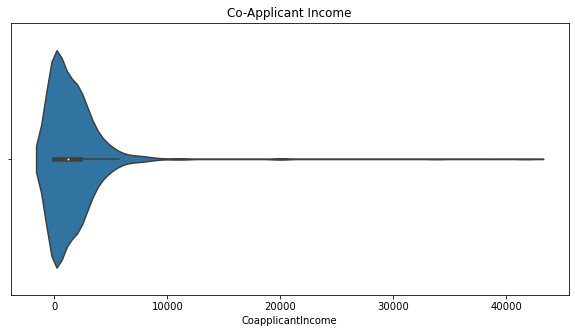

In [15]:
plt.figure(figsize=(10,5))
sns.violinplot(Loan['CoapplicantIncome'])
plt.title('Co-Applicant Income')
plt.show()

Observation:
    
Co-applicant income ranges majorily in range of 0 to 5000.    

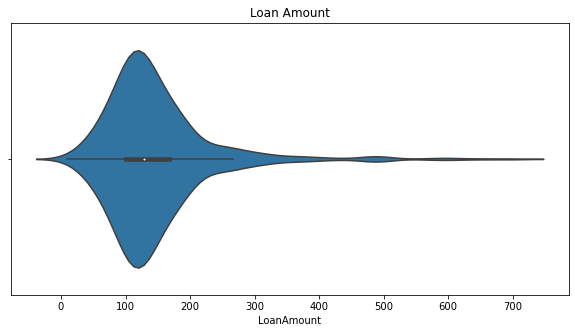

In [16]:
plt.figure(figsize=(10,5))
sns.violinplot(Loan['LoanAmount'])
plt.title('Loan Amount')
plt.show()

Observation:
    
Majority of people are looking loan from 50 to 200.    

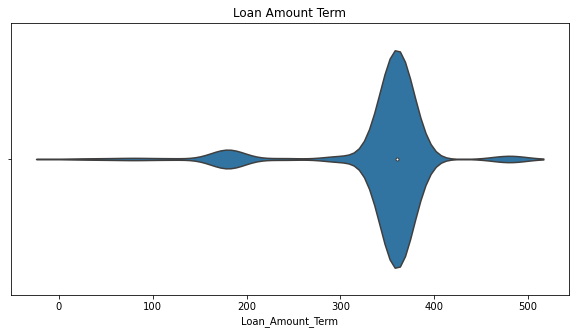

In [17]:
plt.figure(figsize=(10,5))
sns.violinplot(Loan['Loan_Amount_Term'])
plt.title('Loan Amount Term')
plt.show()

Observation:
    
1)Loan amount term is majorly from 300 to 400.

2)Few people are also applying loan amount term from 150 to 200.

3)Very few applicant are also looking for loan amount term from 450 to 500.

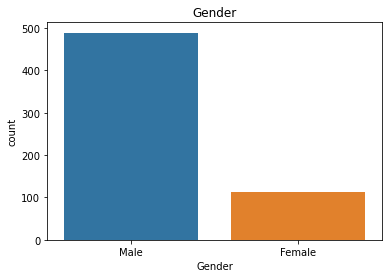

In [18]:
sns.countplot(Loan['Gender'])
plt.title('Gender')
plt.show()

Observation:
    
Male candidates are more than females for loan application.    

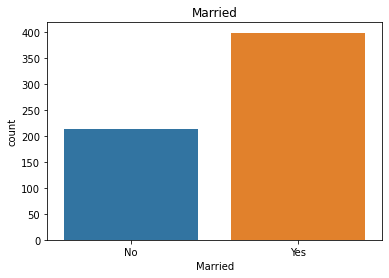

In [19]:
sns.countplot(Loan['Married'])
plt.title('Married')
plt.show()

Observstion:
    
Married candidates are more compared to unmarried for loan application.    

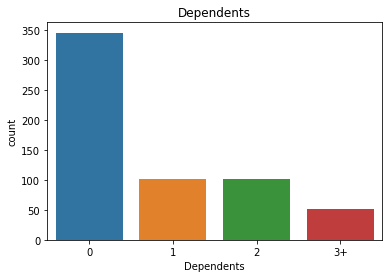

In [20]:
sns.countplot(Loan['Dependents'])
plt.title('Dependents')
plt.show()

Observastion:
    
1)Almost 350 applicant have no dependents.

2)Applicant with 1 and 2 dependents are almost same around 100.

3)Few applicant have 3+ dependents.

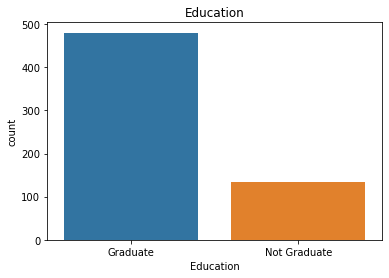

In [21]:
sns.countplot(Loan['Education'])
plt.title('Education')
plt.show()

Observaeeeetion:
    
1)Close to 500 applicants are graduate and very few approx:120 are not graduate.    

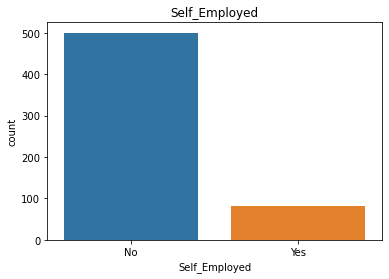

In [22]:
sns.countplot(Loan['Self_Employed'])
plt.title('Self_Employed')
plt.show()

Observation:

1)Around 500 applicants aren't self employed reaming approx 100 aplicants are self employed.

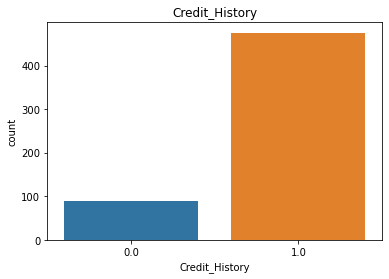

In [23]:
sns.countplot(Loan['Credit_History'])
plt.title('Credit_History')
plt.show()

Observation:
    
1)Applicants with credit atleast once are in mojority of numbers.

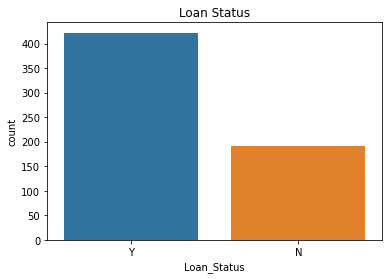

In [24]:
sns.countplot(Loan['Loan_Status'])
plt.title('Loan Status')
plt.show()

Observation:
    
1)Loan application for most of the applicant has been approved and few have been rejected.    

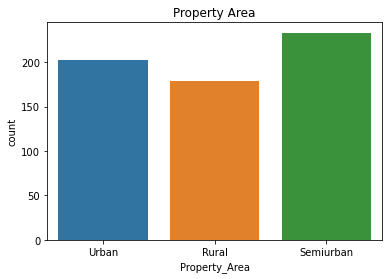

In [25]:
sns.countplot(Loan['Property_Area'])
plt.title('Property Area')
plt.show()

Observation:
    
1)Most applicants have property in semiurban area,approx(200) applicants have property in urban.

### Bivariate Analysis

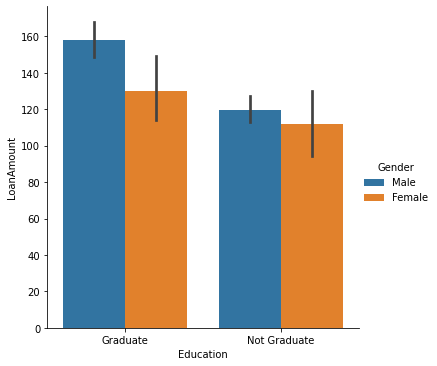

In [26]:
sns.catplot(y='LoanAmount',x='Education',hue='Gender',data=Loan,kind='bar')
plt.show()

Observation:
    
1)In application of higher loan amount ,male applicants are more in both graduate and non gradute list.

2)Female applicants apply for lesser loan amount compared to male applicants, irespective of qualification. 

<Figure size 720x720 with 0 Axes>

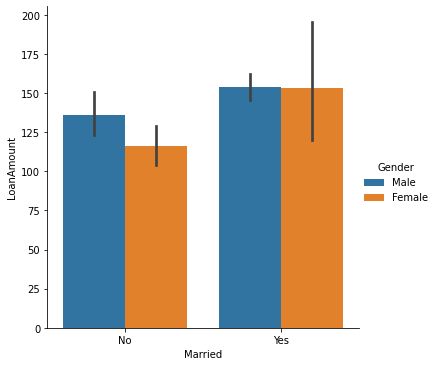

In [27]:
plt.figure(figsize=(10,10))
sns.catplot(y='LoanAmount',x='Married',hue='Gender',data=Loan,kind='bar')
plt.show()

Observation:
    
1)Married applicants apply for higher loan amount compared to unmarried. 

2)In Unmarried category male applicant apply for higher loan amount.

<Figure size 720x720 with 0 Axes>

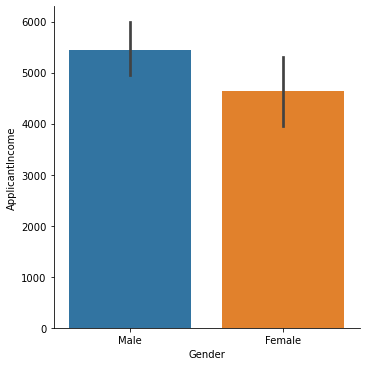

In [28]:
plt.figure(figsize=(10,10))
sns.catplot(y='ApplicantIncome',x='Gender',data=Loan,kind='bar')
plt.show()

Observation:
    
1)Male applicants income is higher than female applicant.    

<Figure size 720x720 with 0 Axes>

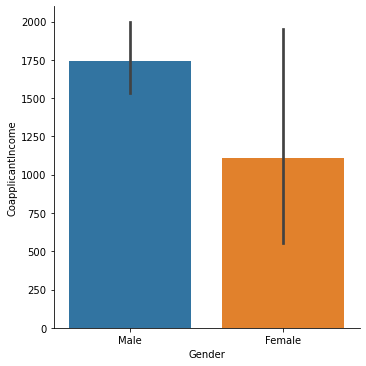

In [29]:
plt.figure(figsize=(10,10))
sns.catplot(y='CoapplicantIncome',x='Gender',data=Loan,kind='bar')
plt.show()

Observation:
    
In coapplicants male have higher income than females.    

<Figure size 720x720 with 0 Axes>

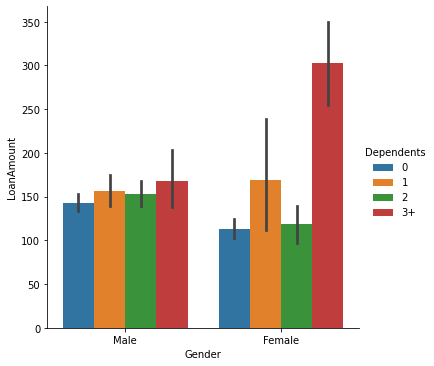

In [30]:
plt.figure(figsize=(10,10))
sns.catplot(y='LoanAmount',x='Gender',hue='Dependents',data=Loan,kind='bar')
plt.show()

Observation:
    
1)Females and makes with 3+ dependents have applied for higher loan amount.

2)Males and females with 1 or 2 dependents have applied for almost similar loan amount.

3)Males with no dependents have applied for more loan amount compared to females with no dependents.

<Figure size 720x720 with 0 Axes>

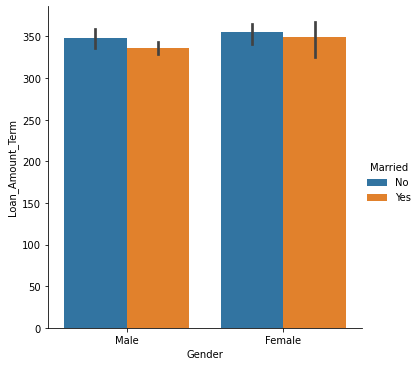

In [31]:
plt.figure(figsize=(10,10))
sns.catplot(y='Loan_Amount_Term',x='Gender',hue='Married',data=Loan,kind='bar')
plt.show()

Observation:
    
Loan amount term is almost similar in males and females .Unmarried males tend for bit higher loan amount term.     

<Figure size 1440x720 with 0 Axes>

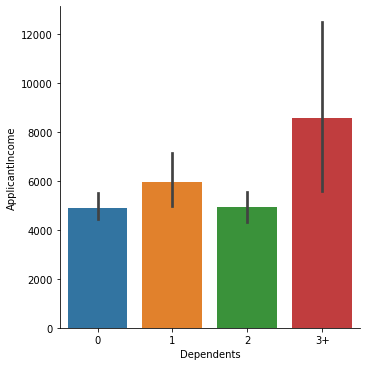

In [32]:
plt.figure(figsize=(20,10))
sns.catplot(y='ApplicantIncome',x='Dependents',data=Loan,kind='bar')
plt.show()

Observation:
    
Applicant with 3+ dependents have highest income.

Applicant with 0 or 2 dependents have similar income.



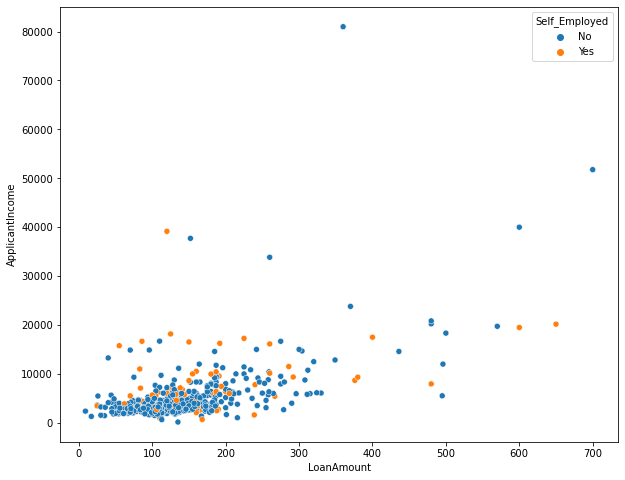

In [33]:
plt.figure(figsize=(10,8))
sns.scatterplot(y='ApplicantIncome',x='LoanAmount',hue='Self_Employed',data=Loan)
plt.show()

Observation:
    
Loan amount and applicant is positively correlated and not self employed applicants are more.   

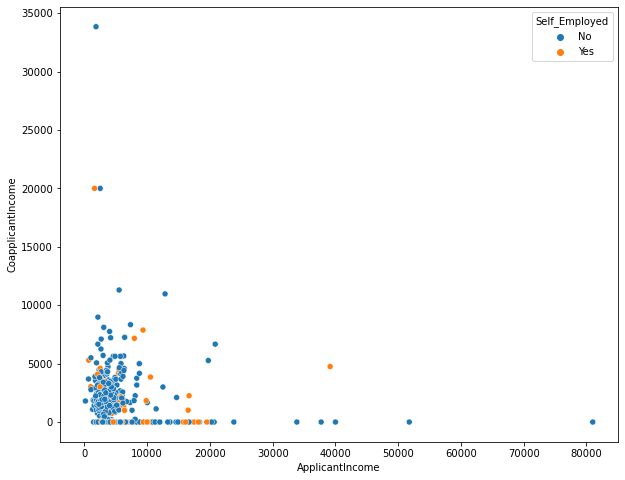

In [34]:
plt.figure(figsize=(10,8))
sns.scatterplot(y='CoapplicantIncome',x='ApplicantIncome',hue='Self_Employed',data=Loan)
plt.show()

Applicant income and coapplicant income are positively correalted.

There are more non self employed applicants

### Multivariate Analysis

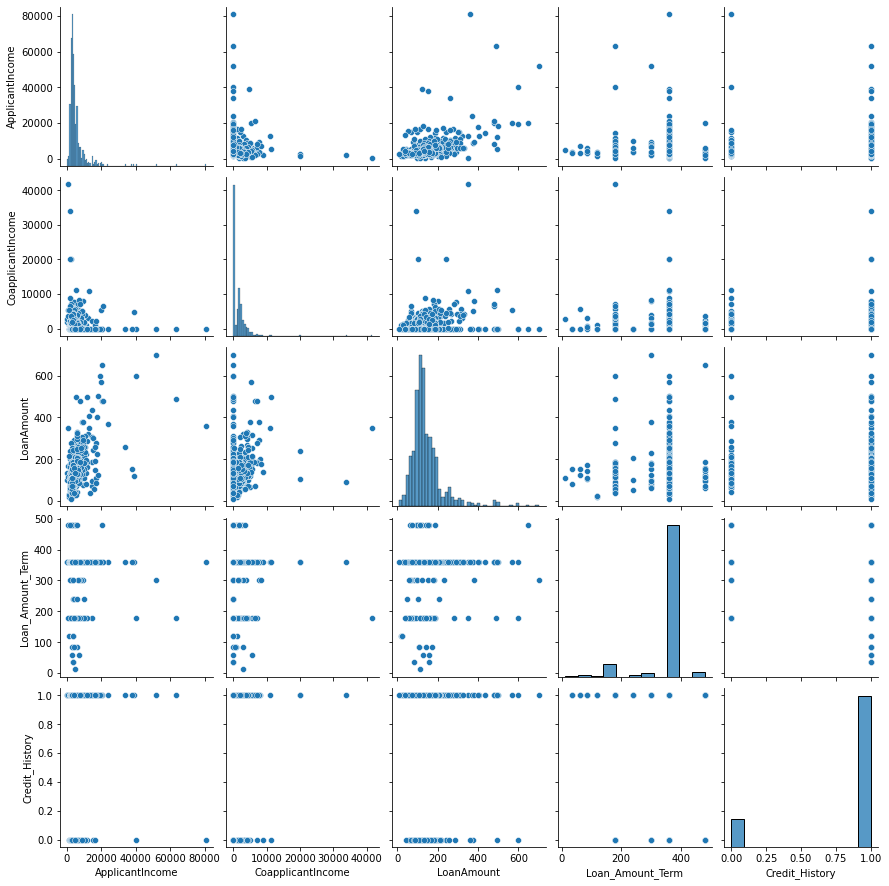

In [35]:
sns.pairplot(Loan)

## Treat Missing values

In [36]:
for i in UN:
    print('column name:',i,'and unique variables are ',Loan[i].unique())

column name: Gender and unique variables are  ['Male' 'Female' nan]
column name: Married and unique variables are  ['No' 'Yes' nan]
column name: Dependents and unique variables are  ['0' '1' '2' '3+' nan]
column name: Education and unique variables are  ['Graduate' 'Not Graduate']
column name: Self_Employed and unique variables are  ['No' 'Yes' nan]
column name: Loan_Amount_Term and unique variables are  [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
column name: Credit_History and unique variables are  [ 1.  0. nan]
column name: Property_Area and unique variables are  ['Urban' 'Rural' 'Semiurban']
column name: Loan_Status and unique variables are  ['Y' 'N']


In [37]:
for i in UN:
    print('column name:',i,'and unique variables are \n ',Loan[i].value_counts(),'\n')

column name: Gender and unique variables are 
  Male      489
Female    112
Name: Gender, dtype: int64 

column name: Married and unique variables are 
  Yes    398
No     213
Name: Married, dtype: int64 

column name: Dependents and unique variables are 
  0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

column name: Education and unique variables are 
  Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

column name: Self_Employed and unique variables are 
  No     500
Yes     82
Name: Self_Employed, dtype: int64 

column name: Loan_Amount_Term and unique variables are 
  360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64 

column name: Credit_History and unique variables are 
  1.0    475
0.0     89
Name: Credit_History, dtype: int64 

column name: Property_Area and unique variables are 
  Semiurban    233
Urban        202
Ru

In [38]:
Loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

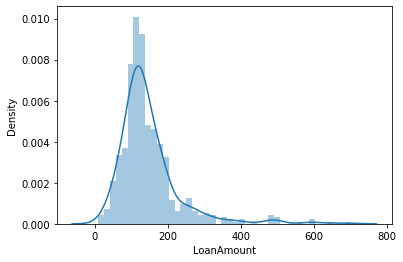

In [39]:
#Filling missing values in numeric columns.
#We will check dist plot to confirm whether to fill missing values eith median or mean.

sns.distplot(Loan['LoanAmount'])

LoanAmount is rightly skewed ,hence will apply median.

In [40]:
Loan['LoanAmount']=Loan['LoanAmount'].fillna(Loan['LoanAmount'].median())

In [41]:
Loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,145.752443,342.00000,0.842199
std,6109.041673,2926.248369,84.107233,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [42]:
#Replace NaN values in categorised columns

In [43]:
Loan['Gender']=Loan['Gender'].fillna(Loan['Gender'].mode()[0])

In [44]:
Loan.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [45]:
Loan['Married']=Loan['Married'].fillna(Loan['Married'].mode()[0])

In [46]:
Loan.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [47]:
Loan['Dependents']=Loan['Dependents'].fillna(Loan['Dependents'].mode()[0])

In [48]:
Loan.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [49]:
Loan['Self_Employed']=Loan['Self_Employed'].fillna(Loan['Self_Employed'].mode()[0])

In [50]:
Loan['Loan_Amount_Term']=Loan['Loan_Amount_Term'].fillna(Loan['Loan_Amount_Term'].mode()[0])

In [51]:
Loan['Credit_History']=Loan['Credit_History'].fillna(Loan['Credit_History'].mode()[0])

In [52]:
for i in UN:
    print('column name:',i,'and unique variables are \n ',Loan[i].value_counts(),'\n')

column name: Gender and unique variables are 
  Male      502
Female    112
Name: Gender, dtype: int64 

column name: Married and unique variables are 
  Yes    401
No     213
Name: Married, dtype: int64 

column name: Dependents and unique variables are 
  0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

column name: Education and unique variables are 
  Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

column name: Self_Employed and unique variables are 
  No     532
Yes     82
Name: Self_Employed, dtype: int64 

column name: Loan_Amount_Term and unique variables are 
  360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64 

column name: Credit_History and unique variables are 
  1.0    525
0.0     89
Name: Credit_History, dtype: int64 

column name: Property_Area and unique variables are 
  Semiurban    233
Urban        202
Ru

##### We will drop the column Loan_ID as it is unique identity number given to customer and won't help in model performance to determine loan approval.

In [53]:
Loan.drop('Loan_ID',axis=1,inplace=True)

###### Now we have treated all the missing values in the dataset

## Correlation

In [54]:
Loan.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


##### Check heat map for correlation.

<AxesSubplot:>

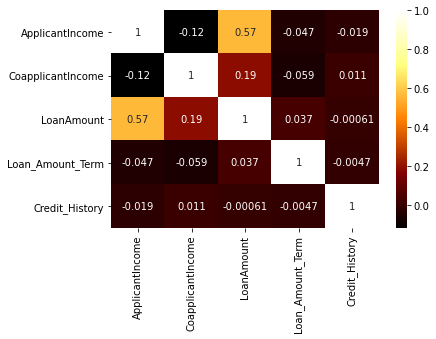

In [55]:
sns.heatmap(Loan.corr(),annot=True,cmap='afmhot')

Observation:
    
Most of the columns are not highly correlated, we will check correlation again after applying encoding to the categorical columns    

## Outliers

###### We will check the outliers from numeric columns.

In [56]:
CN=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
CN

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [57]:
ncols,nrows = (3,1)

#### Box plot for outliers

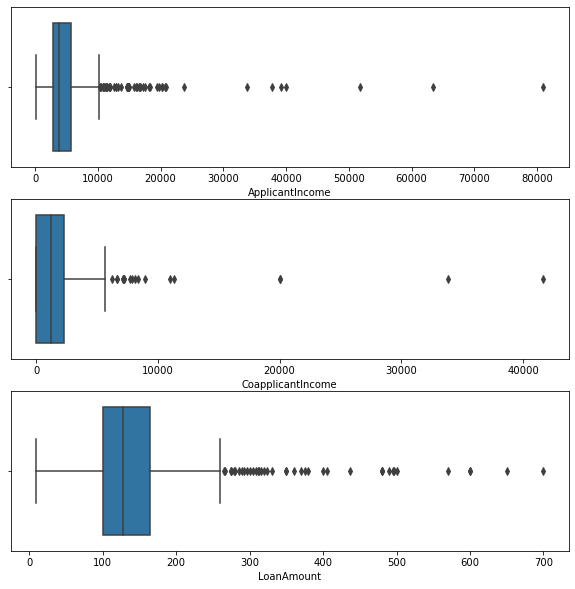

In [58]:
plt.figure(figsize=(10,10))
for index,col in enumerate(CN):
    plt.subplot(ncols,nrows,index+1)
    sns.boxplot(Loan[CN[index]])

We can see huge amount of outliers are present in above columns, we will apply soft caping to treat them individualy by quantile method.

### Quantile

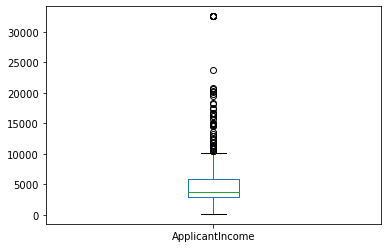

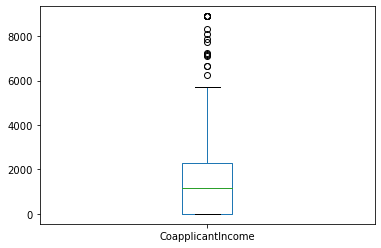

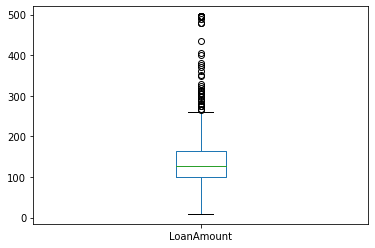

In [59]:
for i in CN:
    
    q4=Loan[i].quantile(0.99)
    Loan[i][Loan[i]>q4]=q4
    Loan[i].plot.box()
    plt.show()

## Encoding

In [60]:
Loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

###### We will apply One hot encoder on Gender,Married,Education,Self_Employed,Credit History,Property_Area columns.

In [61]:
LOHC=['Gender', 'Married', 'Education','Self_Employed','Credit_History','Property_Area']
LOHC

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area']

In [62]:
from sklearn.preprocessing import OneHotEncoder

In [63]:
OHC=OneHotEncoder(handle_unknown='ignore', sparse=False)

In [64]:
for i in LOHC:
    Loan=pd.get_dummies(data=Loan, columns=[i])
    
  

In [65]:
Loan.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849.0,0.0,128.0,360.0,Y,0,1,1,0,1,0,1,0,0,1,0,0,1
1,1,4583.0,1508.0,128.0,360.0,N,0,1,0,1,1,0,1,0,0,1,1,0,0
2,0,3000.0,0.0,66.0,360.0,Y,0,1,0,1,1,0,0,1,0,1,0,0,1
3,0,2583.0,2358.0,120.0,360.0,Y,0,1,0,1,0,1,1,0,0,1,0,0,1
4,0,6000.0,0.0,141.0,360.0,Y,0,1,1,0,1,0,1,0,0,1,0,0,1


##### We will apply Label Encoder on Dependents,Loan_Amount_Term and Loan_Status columns.

In [66]:
LLE=['Dependents','Loan_Amount_Term','Loan_Status']
LLE

['Dependents', 'Loan_Amount_Term', 'Loan_Status']

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
LE=LabelEncoder()

In [69]:
for i in LLE:
    Loan[i]=LE.fit_transform(Loan[i].values.reshape(-1,1))

In [70]:
Loan.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849.0,0.0,128.0,8,1,0,1,1,0,1,0,1,0,0,1,0,0,1
1,1,4583.0,1508.0,128.0,8,0,0,1,0,1,1,0,1,0,0,1,1,0,0
2,0,3000.0,0.0,66.0,8,1,0,1,0,1,1,0,0,1,0,1,0,0,1
3,0,2583.0,2358.0,120.0,8,1,0,1,0,1,0,1,1,0,0,1,0,0,1
4,0,6000.0,0.0,141.0,8,1,0,1,1,0,1,0,1,0,0,1,0,0,1


In [71]:
Loan.isnull().sum()

Dependents                 0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Loan_Status                0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Credit_History_0.0         0
Credit_History_1.0         0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [72]:
Loan.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5209.602394,1483.654967,144.702101,7.667752,0.687296,0.182410,0.817590,0.346906,0.653094,0.781759,0.218241,0.866450,0.133550,0.144951,0.855049,0.291531,0.379479,0.328990
std,1.009623,4533.747664,1831.226927,78.645640,1.109224,0.463973,0.386497,0.386497,0.476373,0.476373,0.413389,0.413389,0.340446,0.340446,0.352339,0.352339,0.454838,0.485653,0.470229
min,0.000000,150.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,3812.500000,1188.500000,128.000000,8.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,5795.000000,2297.250000,164.750000,8.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,32540.410000,8895.890000,495.870000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Spliting

In [73]:
x=Loan.drop('Loan_Status',axis=1)
y=Loan.iloc[:,5:6]

In [74]:
x.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849.0,0.0,128.0,8,0,1,1,0,1,0,1,0,0,1,0,0,1
1,1,4583.0,1508.0,128.0,8,0,1,0,1,1,0,1,0,0,1,1,0,0
2,0,3000.0,0.0,66.0,8,0,1,0,1,1,0,0,1,0,1,0,0,1
3,0,2583.0,2358.0,120.0,8,0,1,0,1,0,1,1,0,0,1,0,0,1
4,0,6000.0,0.0,141.0,8,0,1,1,0,1,0,1,0,0,1,0,0,1


In [75]:
y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [76]:
y.value_counts()

Loan_Status
1              422
0              192
dtype: int64

### Correcting Imbalancing

In [77]:
import imblearn

In [78]:
from imblearn.over_sampling import SMOTE

In [79]:
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)

In [80]:
y_over.value_counts()

Loan_Status
1              422
0              422
dtype: int64

we can see that oversampling is succesfully applied for the target

In [81]:
x_over.shape

(844, 18)

In [82]:
y_over.shape

(844, 1)

### Skewness

In [83]:
x_over.skew()

Dependents                 1.148833
ApplicantIncome            3.210062
CoapplicantIncome          1.621141
LoanAmount                 2.151414
Loan_Amount_Term          -2.974946
Gender_Female              1.945758
Gender_Male               -1.326806
Married_No                 0.857240
Married_Yes               -0.312333
Education_Graduate        -1.003613
Education_Not Graduate     1.689065
Self_Employed_No          -1.834754
Self_Employed_Yes          2.680237
Credit_History_0.0         1.858638
Credit_History_1.0        -0.900515
Property_Area_Rural        1.071415
Property_Area_Semiurban    0.894269
Property_Area_Urban        1.050777
dtype: float64

We can see high skewness in Applicantincome,Coapplicant Income and Loan amount column.

In [84]:
x_over['ApplicantIncome']=np.log(x_over['ApplicantIncome'])
x_over['ApplicantIncome'].skew()

0.3187871381866378

In [85]:
x_over['CoapplicantIncome']=np.sqrt(x_over['CoapplicantIncome'])
x_over['CoapplicantIncome'].skew()

0.3428093591245968

In [86]:
x_over['LoanAmount']=np.log(x_over['LoanAmount'])
x_over['LoanAmount'].skew()

-0.12363433221983999

##### Skewness of all the three columns is within the limit of -0.5 to 0.5.

## Scaling

In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
scaler=MinMaxScaler()
x_over=pd.DataFrame(scaler.fit_transform(x_over),columns=x_over.columns)

In [89]:
x_over.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.000000,0.680978,0.000000,0.662197,0.888889,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.333333,0.635637,0.411724,0.662197,0.888889,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.000000,0.556869,0.000000,0.496978,0.888889,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.000000,0.529049,0.514846,0.646099,0.888889,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.000000,0.685716,0.000000,0.686324,0.888889,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


#### Data is ready for model execution after treating the missing values,encoding,removing skewness and scaling.

## Model Execution

In [90]:
#Best random_state for model execution.
maxAccu=0
maxRS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=i)
    LG=LogisticRegression()
    LG.fit(x_train,y_train)
    pred=LG.predict(x_test)
    ac=accuracy_score(y_test,pred)
    
    if ac>maxAccu:
        maxAccu=ac
        maxRS=i
        
print('Best Accuracy score is',maxAccu*100,'at random state',maxRS)

Best Accuracy score is 88.58267716535433 at random state 45


##### We will consider random_state 83 for all the models .

## Logistic Regression

In [91]:
    LG=LogisticRegression(random_state=83)
    LG.fit(x_train,y_train)
    LG.score(x_train,y_train)
    pred=LG.predict(x_test)
    print('The model is:',LG)
    print('Accuracy score:',accuracy_score(y_test,pred)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,pred))
    print('\n')
    print('classification report\n',classification_report(y_test,pred))
    print('\n')
    print('cross validation score')
    score=cross_val_score(LG,x_over,y_over,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,pred)-(score.mean())))
    print('\n')

The model is: LogisticRegression(random_state=83)
Accuracy score: 81.10236220472441


confusion matrix 
 [[ 88  44]
 [  4 118]]


classification report
               precision    recall  f1-score   support

           0       0.96      0.67      0.79       132
           1       0.73      0.97      0.83       122

    accuracy                           0.81       254
   macro avg       0.84      0.82      0.81       254
weighted avg       0.85      0.81      0.81       254



cross validation score
cross val score [0.68639053 0.71005917 0.90532544 0.96449704 0.96428571]
cross val score mean: 84.61115807269654


Difference between accuracy score and cross val mean score : -0.035087958679721254




### Hyper parameter tunning using GridSearchCV for Logistic Regression

In [92]:
from sklearn.model_selection import GridSearchCV

params = { 'penalty': ['l2'],'tol':[0.0001,0.001,0.01],'multi_class' : ['auto', 'ovr', 'multinomial']}

grid_search_LG=GridSearchCV(estimator=LG,param_grid=params,cv=7,n_jobs=-1,verbose=1)

grid_search_LG.fit(x_train,y_train)

Fitting 7 folds for each of 9 candidates, totalling 63 fits


GridSearchCV(cv=7, estimator=LogisticRegression(random_state=83), n_jobs=-1,
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l2'], 'tol': [0.0001, 0.001, 0.01]},
             verbose=1)

In [93]:
Best_LG=grid_search_LG.best_estimator_
Best_LG

LogisticRegression(multi_class='multinomial', random_state=83)

In [94]:
grid_search_LG.best_score_

0.8678871548619448

In [95]:
def evaluate_model(classifier):
    print("Train Accuracy :", accuracy_score(y_train, classifier.predict(x_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, classifier.predict(x_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, classifier.predict(x_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier.predict(x_test)))

In [96]:
evaluate_model(Best_LG)

Train Accuracy : 0.8677966101694915
Train Confusion Matrix:
[[215  75]
 [  3 297]]
--------------------------------------------------
Test Accuracy : 0.8188976377952756
Test Confusion Matrix:
[[ 90  42]
 [  4 118]]


In [97]:
    grid_search_LG.score(x_train,y_train)
    predl=grid_search_LG.predict(x_test)
    print('The model is:',LG)
    print('Accuracy score:',accuracy_score(y_test,predl)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,predl))
    print('\n')
    print('classification report\n',classification_report(y_test,predl))
    print('\n')
    print('cross validation score')
    score=cross_val_score(grid_search_LG,x_over,y_over,cv=3)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,predl)-(score.mean())))
    print('\n')

The model is: LogisticRegression(random_state=83)
Accuracy score: 81.88976377952756


confusion matrix 
 [[ 90  42]
 [  4 118]]


classification report
               precision    recall  f1-score   support

           0       0.96      0.68      0.80       132
           1       0.74      0.97      0.84       122

    accuracy                           0.82       254
   macro avg       0.85      0.82      0.82       254
weighted avg       0.85      0.82      0.82       254



cross validation score
Fitting 7 folds for each of 9 candidates, totalling 63 fits
Fitting 7 folds for each of 9 candidates, totalling 63 fits
Fitting 7 folds for each of 9 candidates, totalling 63 fits
cross val score [0.69503546 0.86476868 0.94661922]
cross val score mean: 83.54744537829265


Difference between accuracy score and cross val mean score : -0.016576815987650928




Difference between accuracy score and cross val mean score : -0.027125999745899576 at CV:7
        
Difference between accuracy score and cross val mean score : -0.015012287354441933 at CV:3
       
Difference between accuracy score and cross val mean score : -0.022093503105011236 at CV:5        

#### AUC ROC CURVE FOR LOGISTIC REGRESSION

In [98]:
from sklearn.metrics import plot_roc_curve

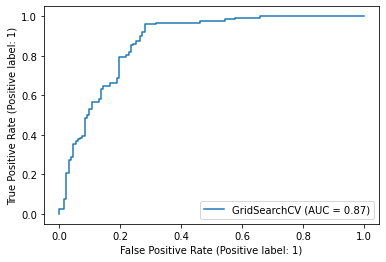

In [99]:
plot_roc_curve(grid_search_LG,x_test, y_test)
plt.show()

In [100]:
auc_score_LG=roc_auc_score(y_test,predl)
auc_score_LG*100

82.45156482861401

##### Logistic Regression after hyper tunning is giving us the best performance of 83.78% and at cross fold = 3 we are getting least difference of -0.0150 between best score and croos val mean score

### ADA BOOST CLASSIFIER

In [101]:
ad=AdaBoostClassifier(n_estimators=75)

In [102]:
    ad.fit(x_train,y_train)
    ad.score(x_train,y_train)
    pred_y=ad.predict(x_test)
    print('The model is:',ad)
    print('Accuracy score:',accuracy_score(y_test,pred_y))
    print('confusion matrix \n',confusion_matrix(y_test,pred_y))
    print('classification report \n',classification_report(y_test,pred_y))
    print('\n')
    print('cross validation score')
    score=cross_val_score(ad,x_over,y_over,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean())
    print('Best score:',(accuracy_score(y_test,pred_y)-(score.mean())))
    print('\n')

The model is: AdaBoostClassifier(n_estimators=75)
Accuracy score: 0.7755905511811023
confusion matrix 
 [[ 91  41]
 [ 16 106]]
classification report 
               precision    recall  f1-score   support

           0       0.85      0.69      0.76       132
           1       0.72      0.87      0.79       122

    accuracy                           0.78       254
   macro avg       0.79      0.78      0.77       254
weighted avg       0.79      0.78      0.77       254



cross validation score
cross val score [0.68639053 0.69230769 0.84615385 0.90532544 0.875     ]
cross val score mean: 0.80103550295858
Best score: -0.02544495177747763




### HYPER PARAMETER TUNNING FOR ADA BOOST CLASSIFIER

In [103]:
paramss = {
     
    'learning_rate': [0.5,0.8,0.9],
    'n_estimators': [50,100,150,200]
}


ada_HT = GridSearchCV(
                           estimator=ad,
                           param_grid=paramss,
                           cv = 5,
                           )

ada_HT.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(n_estimators=75),
             param_grid={'learning_rate': [0.5, 0.8, 0.9],
                         'n_estimators': [50, 100, 150, 200]})

In [104]:
ada_HT.best_estimator_

AdaBoostClassifier(learning_rate=0.8)

In [105]:
ad_best=ada_HT.best_estimator_
ad_best

AdaBoostClassifier(learning_rate=0.8)

In [106]:
evaluate_model(ad_best)

Train Accuracy : 0.8694915254237288
Train Confusion Matrix:
[[219  71]
 [  6 294]]
--------------------------------------------------
Test Accuracy : 0.7677165354330708
Test Confusion Matrix:
[[ 85  47]
 [ 12 110]]


In [107]:
    ada_HT.score(x_train,y_train)
    preda=ada_HT.predict(x_test)
    print('The model is:',ad)
    print('Accuracy score:',accuracy_score(y_test,preda)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,preda))
    print('\n')
    print('classification report\n',classification_report(y_test,preda))
    print('\n')
    print('cross validation score')
    score=cross_val_score(ada_HT,x_over,y_over,cv=3)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,preda)-(score.mean())))
    print('\n')
    

The model is: AdaBoostClassifier(n_estimators=75)
Accuracy score: 76.77165354330708


confusion matrix 
 [[ 85  47]
 [ 12 110]]


classification report
               precision    recall  f1-score   support

           0       0.88      0.64      0.74       132
           1       0.70      0.90      0.79       122

    accuracy                           0.77       254
   macro avg       0.79      0.77      0.77       254
weighted avg       0.79      0.77      0.76       254



cross validation score
cross val score [0.69148936 0.82206406 0.85053381]
cross val score mean: 78.80290754902704


Difference between accuracy score and cross val mean score : -0.020312540057199513




Difference between accuracy score and cross val mean score : 0.007225482443527831 at CV:3
        
Difference between accuracy score and cross val mean score : -0.015262589217767797 at CV:5
        
Difference between accuracy score and cross val mean score : -0.021430430700294822 at CV:7        

### AUC ROC CURVE FOR AdaBoostClassifer

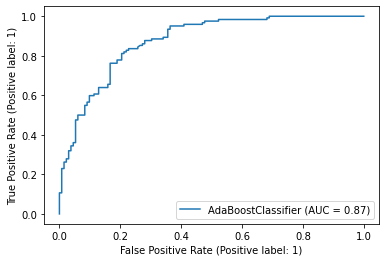

In [108]:
plot_roc_curve(ad_best,x_test, y_test)
plt.show()

In [109]:
auc_score_ad=roc_auc_score(y_test,preda)
auc_score_ad

0.7727893691008445

##### Ada Boost Classifier model after hyper tunning is giving us the best performance of 78.805% and at cross fold = 3 we are getting least difference of 0.00722 between best score and croos val mean score

## KNNeighbors Classifier

In [110]:
KNN=KNeighborsClassifier(n_neighbors=2)

In [111]:
    KNN.fit(x_train,y_train)
    KNN.score(x_train,y_train)
    predk=KNN.predict(x_test)
    print('The model is:',KNN)
    print('Accuracy score:',accuracy_score(y_test,predk)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,predk))
    print('\n')
    print('classification report\n',classification_report(y_test,predk))
    print('\n')
    print('cross validation score')
    score=cross_val_score(KNN,x_over,y_over,cv=3)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,predk)-(score.mean())))
    print('\n')

The model is: KNeighborsClassifier(n_neighbors=2)
Accuracy score: 74.40944881889764


confusion matrix 
 [[106  26]
 [ 39  83]]


classification report
               precision    recall  f1-score   support

           0       0.73      0.80      0.77       132
           1       0.76      0.68      0.72       122

    accuracy                           0.74       254
   macro avg       0.75      0.74      0.74       254
weighted avg       0.75      0.74      0.74       254



cross validation score
cross val score [0.68794326 0.75800712 0.79003559]
cross val score mean: 74.53286556792273


Difference between accuracy score and cross val mean score : -0.0012341674902508482




KnNeighbours: ACCURACY SCORE-->74.015%

DIFF. BETWEEN ACCURACY SCORE AND CROSS VAL MEAN SCORE IS-->-0.006%

#### Hyper parameter tunning using GridSearchCV for KNNeighbors Classifier

In [112]:
params = { 'weights':['distance','uniform'], 'algorithm':['ball_tree','kd_tree'], 'leaf_size':[30,60], 'p':[3,2,4,5]}

KNC=GridSearchCV(estimator=KNN,param_grid=params,cv=7,n_jobs=-1)

KNC.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(n_neighbors=2), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'leaf_size': [30, 60], 'p': [3, 2, 4, 5],
                         'weights': ['distance', 'uniform']})

In [113]:
KN=KNC.best_estimator_
KN

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=2, weights='distance')

In [114]:
KNC.best_score_

0.7830332132853142

In [115]:
evaluate_model(KN)

Train Accuracy : 1.0
Train Confusion Matrix:
[[290   0]
 [  0 300]]
--------------------------------------------------
Test Accuracy : 0.7755905511811023
Test Confusion Matrix:
[[ 97  35]
 [ 22 100]]


In [116]:
%%time
    KNC.score(x_train,y_train)
    predn=KNC.predict(x_test)
    print('The model is:',KNN)
    print('Accuracy score:',accuracy_score(y_test,predn)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,predn))
    print('\n')
    print('classification report\n',classification_report(y_test,predn))
    print('\n')
    print('cross validation score')
    score=cross_val_score(KNC,x_over,y_over,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,predn)-(score.mean())))
    print('\n')

The model is: KNeighborsClassifier(n_neighbors=2)
Accuracy score: 77.55905511811024


confusion matrix 
 [[ 97  35]
 [ 22 100]]


classification report
               precision    recall  f1-score   support

           0       0.82      0.73      0.77       132
           1       0.74      0.82      0.78       122

    accuracy                           0.78       254
   macro avg       0.78      0.78      0.78       254
weighted avg       0.78      0.78      0.78       254



cross validation score
cross val score [0.67455621 0.69822485 0.81656805 0.85798817 0.8452381 ]
cross val score mean: 77.85150746689209


Difference between accuracy score and cross val mean score : -0.0029245234878185755


Wall time: 9.55 s


Difference between accuracy score and cross val mean score : -0.01145195177049152 at CV:7
        
Difference between accuracy score and cross val mean score : 0.0029657646621686906 at CV:3  
        
Difference between accuracy score and cross val mean score : -0.0017481357729692837 at CV:5        

#### AUC ROC CURVE FOR KNeighbors Classifie

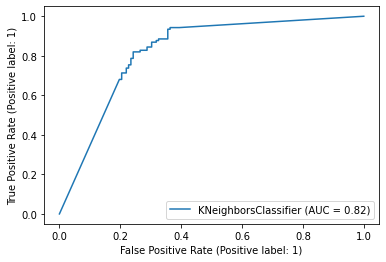

In [117]:
plot_roc_curve(KN,x_test, y_test)
plt.show()

In [118]:
auc_score_KN=roc_auc_score(y_test,predn)
auc_score_KN*100

77.7260307998013

##### KNeighbors Classifier after hyper tunning is giving us the best performance of 77.73% and at cross fold = 5 we are getting least difference of -0.0017 between best score and croos val mean score

## Random Forest Classifier

In [119]:
rf=RandomForestClassifier(n_estimators=150)

In [120]:
    rf.fit(x_train,y_train)
    rf.score(x_train,y_train)
    pred=rf.predict(x_test)
    print('The model is:',rf)
    print('Accuracy score:',accuracy_score(y_test,pred))
    print('confusion matrix \n',confusion_matrix(y_test,pred))
    print('classification report \n',classification_report(y_test,pred))
    print('\n')
    print('cross validation score')
    score=cross_val_score(rf,x_over,y_over,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean())
    print('Best score:',(accuracy_score(y_test,pred)-(score.mean())))
    print('\n')

The model is: RandomForestClassifier(n_estimators=150)
Accuracy score: 0.8110236220472441
confusion matrix 
 [[ 97  35]
 [ 13 109]]
classification report 
               precision    recall  f1-score   support

           0       0.88      0.73      0.80       132
           1       0.76      0.89      0.82       122

    accuracy                           0.81       254
   macro avg       0.82      0.81      0.81       254
weighted avg       0.82      0.81      0.81       254



cross validation score
cross val score [0.71597633 0.75147929 0.86390533 0.92307692 0.94642857]
cross val score mean: 0.8401732882502113
Best score: -0.029149666202967217




#### HYPER PARAMETER TUNNING FOR RANDOM FOREST CLASSIFIER

In [121]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [5,10,20,30],
    'min_samples_leaf': [5,10,20],
    'n_estimators': [10,20,30,50,100,150]
}


grid_search_rf = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")


grid_search_rf.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=150),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [10, 20, 30, 50, 100, 150]},
             scoring='accuracy', verbose=1)

In [122]:
grid_search_rf.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=20)

In [123]:
rf_best=grid_search_rf.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=20)

In [124]:
grid_search_rf.best_score_

0.8542372881355933

In [125]:
def evaluate_model(classifier):
    print("Train Accuracy :", accuracy_score(y_train, classifier.predict(x_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, classifier.predict(x_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, classifier.predict(x_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier.predict(x_test)))

In [126]:
evaluate_model(rf_best)

Train Accuracy : 0.8813559322033898
Train Confusion Matrix:
[[223  67]
 [  3 297]]
--------------------------------------------------
Test Accuracy : 0.7952755905511811
Test Confusion Matrix:
[[ 86  46]
 [  6 116]]


In [127]:
%%time    
    grid_search_rf.score(x_train,y_train)
    predr=grid_search_rf.predict(x_test)
    print('The model is:',rf)
    print('Accuracy score:',accuracy_score(y_test,predr)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,predr))
    print('\n')
    print('classification report\n',classification_report(y_test,predr))
    print('\n')
    print('cross validation score')
    score=cross_val_score(grid_search_rf,x_over,y_over,cv=3)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,predr)-(score.mean())))
    print('\n')

The model is: RandomForestClassifier(n_estimators=150)
Accuracy score: 79.52755905511812


confusion matrix 
 [[ 86  46]
 [  6 116]]


classification report
               precision    recall  f1-score   support

           0       0.93      0.65      0.77       132
           1       0.72      0.95      0.82       122

    accuracy                           0.80       254
   macro avg       0.83      0.80      0.79       254
weighted avg       0.83      0.80      0.79       254



cross validation score
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
cross val score [0.70567376 0.85409253 0.89323843]
cross val score mean: 81.7668239906447


Difference between accuracy score and cross val mean score : -0.02239264935526586


Wall time: 47.5 s


Difference between accuracy score and cross val mean score : -0.0372577136535619 at CF:7
        
Difference between accuracy score and cross val mean score : -0.02635870590140732 at CV:5  

Difference between accuracy score and cross val mean score : -0.009786294696050746 at CV:3        

### AUC ROC CURVE FOR RF

In [128]:
from sklearn.metrics import plot_roc_curve

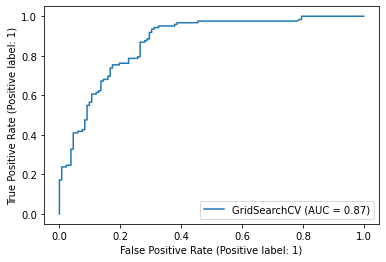

In [129]:
plot_roc_curve(grid_search_rf,x_test, y_test)
plt.show()

In [130]:
auc_score=roc_auc_score(y_test,pred)
auc_score

0.8141455538996523

##### Random Forest Classifier after hyper tunning is giving us the best performance of 81.29% and at cross fold = 3 we are getting least difference of -0.009 between best score and croos val mean score

## DecissionTree Classifier

In [131]:
    DTC=DecisionTreeClassifier(random_state=83)
    DTC.fit(x_train,y_train)
    DTC.score(x_train,y_train)
    pred=DTC.predict(x_test)
    print('The model is:',DTC)
    print('Accuracy score:',accuracy_score(y_test,pred)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,pred))
    print('\n')
    print('classification report\n',classification_report(y_test,pred))
    print('\n')
    print('cross validation score')
    score=cross_val_score(DTC,x,y,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,pred)-(score.mean()))*100)
    print('\n')

The model is: DecisionTreeClassifier(random_state=83)
Accuracy score: 76.77165354330708


confusion matrix 
 [[98 34]
 [25 97]]


classification report
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       132
           1       0.74      0.80      0.77       122

    accuracy                           0.77       254
   macro avg       0.77      0.77      0.77       254
weighted avg       0.77      0.77      0.77       254



cross validation score
cross val score [0.69918699 0.69918699 0.68292683 0.75609756 0.74590164]
cross val score mean: 71.66600026656005


Difference between accuracy score and cross val mean score : 5.105653276747035




### Hyper parameter tunning using GridSearchCV for Decision Tree Classifier

In [132]:
from sklearn.model_selection import GridSearchCV

params = { 'criterion': ['gini','entropy'],'max_depth': [2,3,5,10,20],'min_samples_leaf':[5,10,20,50,100]}

grid_search_DTC=GridSearchCV(estimator=DTC,param_grid=params,cv=7,n_jobs=-1,verbose=1,scoring='accuracy')

grid_search_DTC.fit(x_train,y_train)

Fitting 7 folds for each of 50 candidates, totalling 350 fits


GridSearchCV(cv=7, estimator=DecisionTreeClassifier(random_state=83), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [133]:
Best_dtc=grid_search_DTC.best_estimator_
Best_dtc

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=83)

In [134]:
grid_search_DTC.best_score_

0.8170468187274909

In [135]:
def evaluate_model(classifier):
    print("Train Accuracy :", accuracy_score(y_train, classifier.predict(x_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, classifier.predict(x_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, classifier.predict(x_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier.predict(x_test)))

In [136]:
evaluate_model(Best_dtc)

Train Accuracy : 0.8423728813559322
Train Confusion Matrix:
[[222  68]
 [ 25 275]]
--------------------------------------------------
Test Accuracy : 0.7913385826771654
Test Confusion Matrix:
[[ 89  43]
 [ 10 112]]


In [137]:
    grid_search_DTC.score(x_train,y_train)
    predt=grid_search_DTC.predict(x_test)
    print('The model is:',DTC)
    print('Accuracy score:',accuracy_score(y_test,predt)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,predt))
    print('\n')
    print('classification report\n',classification_report(y_test,predt))
    print('\n')
    print('cross validation score')
    score=cross_val_score(grid_search_DTC,x_over,y_over,cv=3)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,predt)-(score.mean())))
    print('\n')

The model is: DecisionTreeClassifier(random_state=83)
Accuracy score: 79.13385826771653


confusion matrix 
 [[ 89  43]
 [ 10 112]]


classification report
               precision    recall  f1-score   support

           0       0.90      0.67      0.77       132
           1       0.72      0.92      0.81       122

    accuracy                           0.79       254
   macro avg       0.81      0.80      0.79       254
weighted avg       0.81      0.79      0.79       254



cross validation score
Fitting 7 folds for each of 50 candidates, totalling 350 fits
Fitting 7 folds for each of 50 candidates, totalling 350 fits
Fitting 7 folds for each of 50 candidates, totalling 350 fits
cross val score [0.69503546 0.74733096 0.88967972]
cross val score mean: 77.73487123831639


Difference between accuracy score and cross val mean score : 0.01398987029400156




Difference between accuracy score and cross val mean score : -0.037094562559845334 at CV:7.
        
Difference between accuracy score and cross val mean score : -0.023865600379834095 at CV:5 
        
Difference between accuracy score and cross val mean score : -0.008445937329689568 at CV:3        

### AUC ROC CURVE FOR DTC

In [138]:
from sklearn.metrics import plot_roc_curve

<Figure size 1080x1080 with 0 Axes>

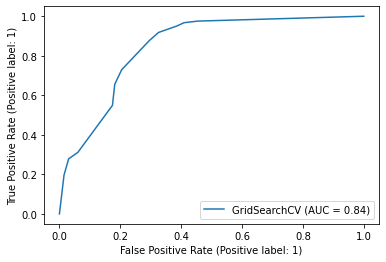

In [139]:
plt.figure(figsize=(15,15))
plot_roc_curve(grid_search_DTC,x_test, y_test)
plt.show()

In [140]:
auc_score=roc_auc_score(y_test,grid_search_DTC.predict(x_test))

In [141]:
auc_score

0.7961376055638352

### Conclusion:

#### Logistic Regression after hyper tunning is giving us the best performance of 83.78% and at cross fold = 3 we are getting least difference of -0.0150 between best score and croos val mean score and will consider that final model

#### Classification report

               precision    recall  f1-score   support

           0       0.96      0.68      0.80       132
           1       0.74      0.97      0.84       122

## JOBLIB

In [144]:
joblib.dump(grid_search_LG,'Loan.obj')

['Loan.obj']